In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('traffic_violaions.csv')
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [5]:
data.shape

(52966, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52966 non-null  object 
 1   stop_time           52965 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       49580 non-null  object 
 4   driver_age_raw      49588 non-null  float64
 5   driver_age          49346 non-null  float64
 6   driver_race         49581 non-null  object 
 7   violation_raw       49581 non-null  object 
 8   violation           49581 non-null  object 
 9   search_conducted    52965 non-null  object 
 10  search_type         2085 non-null   object 
 11  stop_outcome        49581 non-null  object 
 12  is_arrested         49581 non-null  object 
 13  stop_duration       49581 non-null  object 
 14  drugs_related_stop  52965 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.1+ MB


In [8]:
data.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
data.dropna(subset = ['driver_gender'], inplace = True)

In [9]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


# Age Distribution

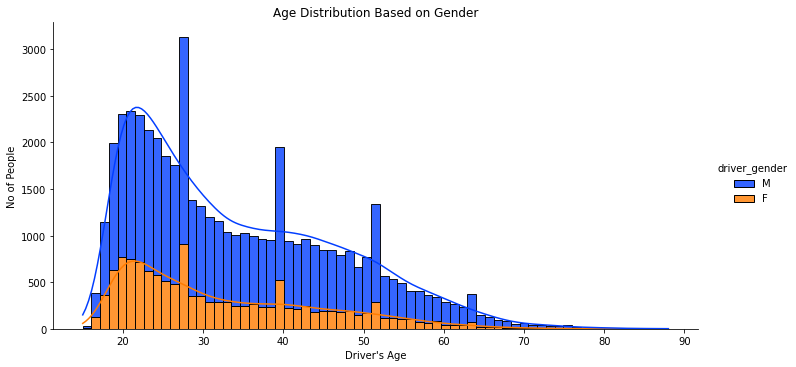

In [10]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

# Distribution in Violation Type

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Speeding'),
  Text(1, 0, 'Moving violation'),
  Text(2, 0, 'Equipment'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Registration/plates')])

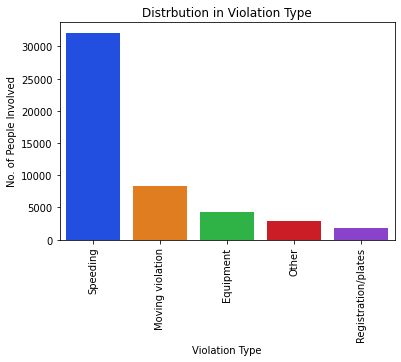

In [12]:
sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved")
plt.xticks(rotation=90)

Text(0, 0.5, 'No. of People Involved')

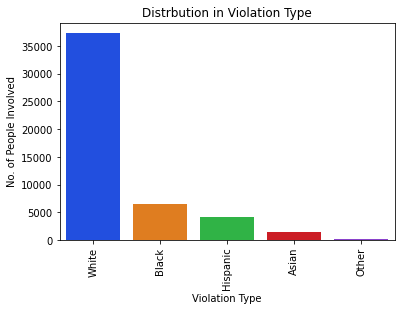

In [18]:
#sns.countplot(x = data.driver_gender, data = data, order = data.driver_gender.value_counts().index, palette = "bright")
sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,linewidth = 0, palette = "bright")
plt.xticks(rotation=90)
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved")

# Age Group Involve in Drugs

Text(7.358203124999996, 0.5, 'No. of People involed in Drugs')

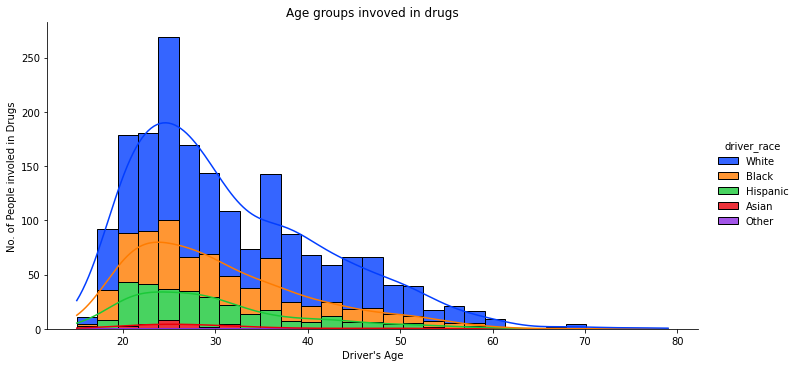

In [19]:
sns.displot(x='driver_age',data = data[data['is_arrested']==True],
            kde = True, hue = 'driver_race', multiple = "stack", alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age groups invoved in drugs')
plt.xlabel("Driver's Age")
plt.ylabel("No. of People involed in Drugs")

In [21]:
data1 = data.copy(deep=True)
pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

data['stop_duration'].value_counts()
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()

data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year
yearly_data = data.groupby('stop_Year').sum()
yearly_data.reset_index(inplace = True)

search_conducted = len(data[data.search_conducted == True])
arrested_after_search = len(data[(data.search_conducted == True) & (data.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

# Hours in Which Speed Violated

Text(0, 0.5, 'No. of Vehicles')

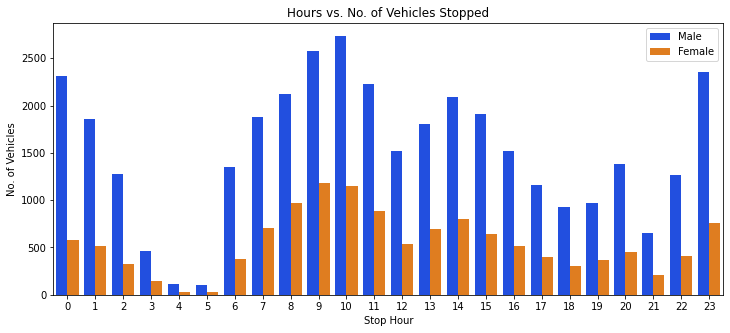

In [22]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles")

Text(0, 0.5, 'No. of Violation')

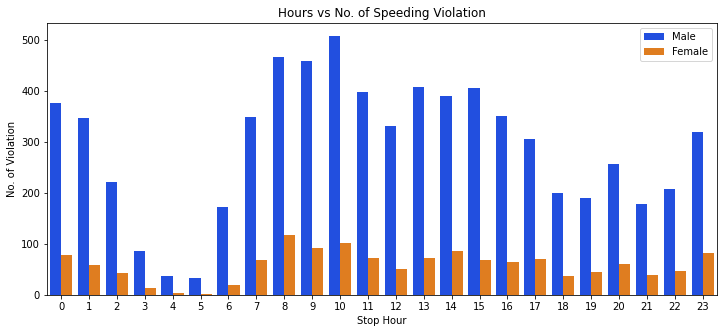

In [23]:
plt.figure(figsize = (12,5))
sns.countplot(x = data[data.violation == 'Moving violation'].stop_hour,data=data[data.violation == 'Moving violation'], 
              hue = 'driver_gender', palette = "bright")
plt.title('Hours vs No. of Speeding Violation')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Violation")

Text(51.0, 0.5, "Driver's Race")

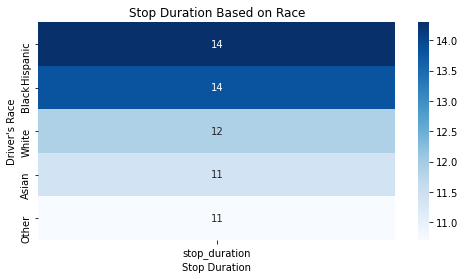

In [24]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'], ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race")

Text(50.99999999999999, 0.5, 'Violation Type')

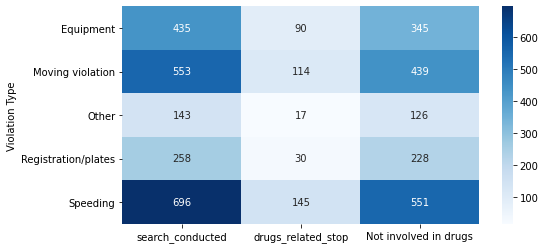

In [25]:
result = data.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Blues");
plt.ylabel("Violation Type")

# Total Search Conduct vs. Drug Related Stop

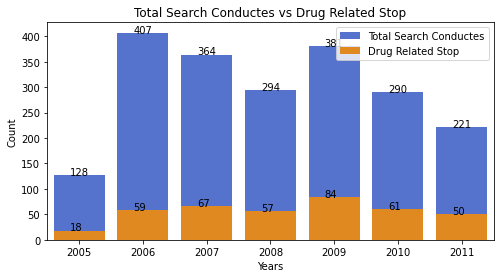

In [26]:
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conductes", color = "royalblue")
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.drugs_related_stop,
            data = yearly_data,label = "Drug Related Stop", color = "darkorange")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.55
    y = i.get_height()
    ax.annotate(count, (x, y))
ax.set_title("Total Search Conductes vs Drug Related Stop")
ax.set(xlabel = "Years", ylabel = "Count")
ax.legend(fontsize = '10')

# Arrested vs. Not Arrested (Before and After Search Conduct)

[Text(0, 0, 'Not Arrested'), Text(1, 0, 'Arrested')]

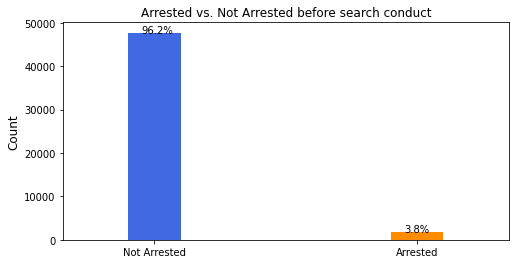

In [27]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.is_arrested.value_counts().plot(kind="bar", width=0.2, figsize=(8, 4), color = ["royalblue","darkorange"])
plt.ylabel("Count", fontsize=12)
plt.title("Arrested vs. Not Arrested before search conduct")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(data.is_arrested))
    x = i.get_x() + i.get_width() - 0.15
    y = i.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(["Not Arrested","Arrested"], rotation = 0)

(-1.1128125759070797, 1.1006101534935908, -1.1137381370417, 1.1189654951302932)

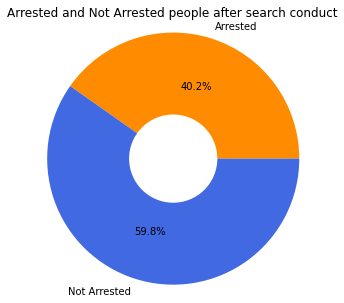

In [28]:
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([arrested, not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["darkorange","royalblue"])
centre_circle = plt.Circle((0,0), 0.35, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Arrested and Not Arrested people after search conduct');
ax.axis('equal')